# Stock Price Prediction using ML Algorithm

## Load required libraries and data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('EOD-AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
0,2017-12-28,171.00,171.850,170.480,171.08,16480187.0,0.0,1.0,41.075401,41.279577,40.950493,41.094617,65920748.0
1,2017-12-27,170.10,170.780,169.710,170.60,21498213.0,0.0,1.0,40.859214,41.022555,40.765534,40.979318,85992852.0
2,2017-12-26,170.80,171.470,169.679,170.57,33185536.0,0.0,1.0,41.027359,41.188298,40.758087,40.972112,132742144.0
3,2017-12-22,174.68,175.424,174.500,175.01,16349444.0,0.0,1.0,41.959363,42.138077,41.916125,42.038631,65397776.0
4,2017-12-21,174.17,176.020,174.100,175.01,20949896.0,0.0,1.0,41.836857,42.281240,41.820043,42.038631,83799584.0


## Perform EDA

In [3]:
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Dividend      0
Split         0
Adj_Open      0
Adj_High      0
Adj_Low       0
Adj_Close     0
Adj_Volume    0
dtype: int64

In [4]:
df.shape

(1090, 13)

In [4]:
df.corr()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Open,1.000000,0.999948,0.999935,0.999866,-0.547597,0.088894,-0.019234,-0.534445,-0.537418,-0.531829,-0.534399,0.502054
High,0.999948,1.000000,0.999941,0.999944,-0.545893,0.088582,-0.019154,-0.535283,-0.538038,-0.532575,-0.534990,0.504125
Low,0.999935,0.999941,1.000000,0.999949,-0.550156,0.089065,-0.019259,-0.533844,-0.536724,-0.530960,-0.533517,0.498174
Close,0.999866,0.999944,0.999949,1.000000,-0.548315,0.088610,-0.019044,-0.534448,-0.537173,-0.531552,-0.533903,0.500617
Volume,-0.547597,-0.545893,-0.550156,-0.548315,1.000000,-0.061064,0.054382,0.085888,0.095572,0.071723,0.081938,0.337092
Dividend,0.088894,0.088582,0.089065,0.088610,-0.061064,1.000000,-0.002708,-0.050353,-0.051215,-0.050306,-0.051095,0.002395
Split,-0.019234,-0.019154,-0.019259,-0.019044,0.054382,-0.002708,1.000000,-0.024993,-0.024640,-0.025124,-0.023978,0.029564
Adj_Open,-0.534445,-0.535283,-0.533844,-0.534448,0.085888,-0.050353,-0.024993,1.000000,0.999528,0.999416,0.998987,-0.549990
Adj_High,-0.537418,-0.538038,-0.536724,-0.537173,0.095572,-0.051215,-0.024640,0.999528,1.000000,0.999278,0.999526,-0.544404
Adj_Low,-0.531829,-0.532575,-0.530960,-0.531552,0.071723,-0.050306,-0.025124,0.999416,0.999278,1.000000,0.999558,-0.560073


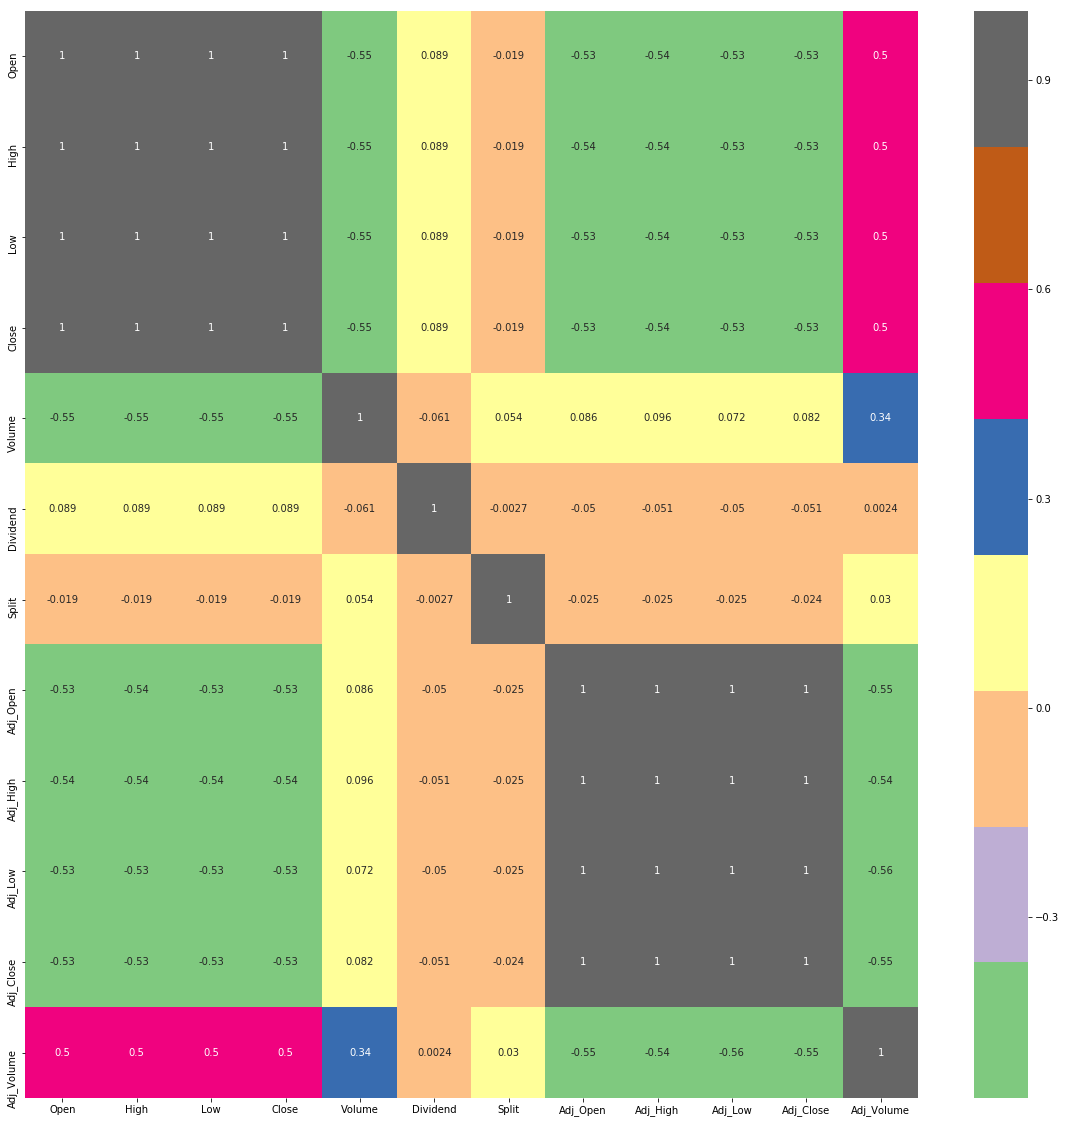

In [5]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr() ,annot=True , cmap=plt.cm.Accent)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020EA9558DA0>,
      dtype=object)

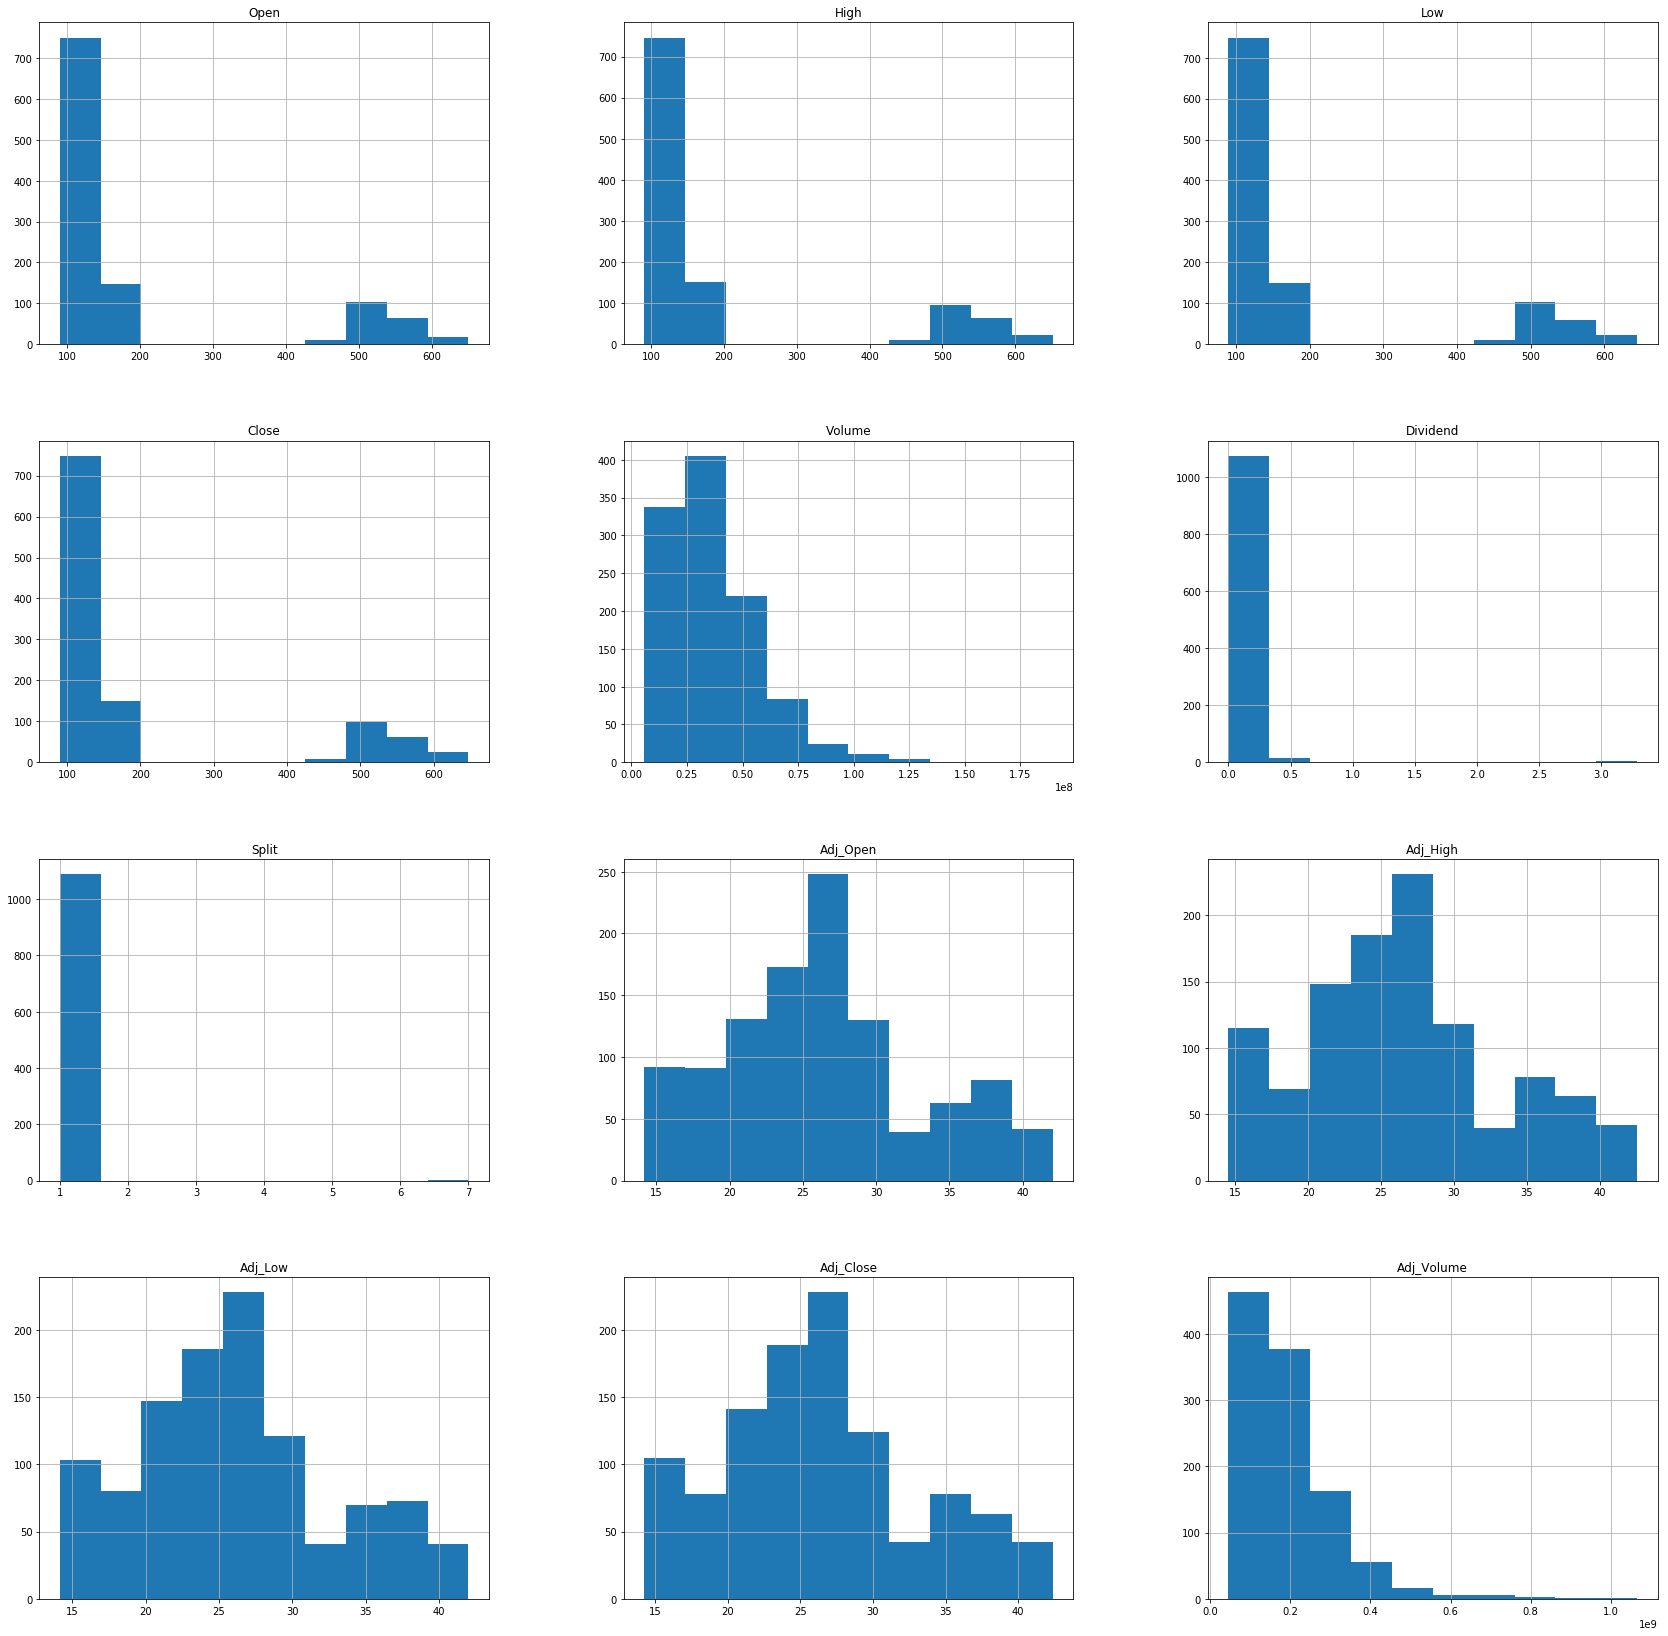

In [6]:
df.hist(figsize=(29,29))

In [13]:
df['HL_PCT']=(df['Adj_High']-df['Adj_Low'])/df['Adj_Close']*100.0
df['PCT_change']=(df['Adj_Close']-df['Adj_Open'])/df['Adj_Open']*100.0

In [14]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,HL_PCT,PCT_change
0,2017-12-28,171.00,171.850,170.480,171.08,16480187.0,0.0,1.0,41.075401,41.279577,40.950493,41.094617,65920748.0,0.800795,0.046784
1,2017-12-27,170.10,170.780,169.710,170.60,21498213.0,0.0,1.0,40.859214,41.022555,40.765534,40.979318,85992852.0,0.627198,0.293945
2,2017-12-26,170.80,171.470,169.679,170.57,33185536.0,0.0,1.0,41.027359,41.188298,40.758087,40.972112,132742144.0,1.050009,-0.134660
3,2017-12-22,174.68,175.424,174.500,175.01,16349444.0,0.0,1.0,41.959363,42.138077,41.916125,42.038631,65397776.0,0.527970,0.188917
4,2017-12-21,174.17,176.020,174.100,175.01,20949896.0,0.0,1.0,41.836857,42.281240,41.820043,42.038631,83799584.0,1.097080,0.482287


In [15]:
df1 = df[['Adj_Close' ,'Dividend', 'Adj_Volume' ,'HL_PCT' , 'PCT_change' ]]

In [16]:
df1.head()

,Adj_Close,Dividend,Adj_Volume,HL_PCT,PCT_change
0,41.094617,0.0,65920748.0,0.800795,0.046784
1,40.979318,0.0,85992852.0,0.627198,0.293945
2,40.972112,0.0,132742144.0,1.050009,-0.134660
3,42.038631,0.0,65397776.0,0.527970,0.188917
4,42.038631,0.0,83799584.0,1.097080,0.482287


In [17]:
df1.isnull().sum()

Adj_Close     0
Dividend      0
Adj_Volume    0
HL_PCT        0
PCT_change    0
dtype: int64

## Divide data into dependent and independent features

In [20]:
X = df1.drop('Adj_Close',axis=1)
y = df1['Adj_Close']

In [21]:
X.head()

,Dividend,Adj_Volume,HL_PCT,PCT_change
0,0.0,65920748.0,0.800795,0.046784
1,0.0,85992852.0,0.627198,0.293945
2,0.0,132742144.0,1.050009,-0.134660
3,0.0,65397776.0,0.527970,0.188917
4,0.0,83799584.0,1.097080,0.482287


In [22]:
y.head()

0    41.094617
1    40.979318
2    40.972112
3    42.038631
4    42.038631
Name: Adj_Close, dtype: float64

## Split data into train and test

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=51)

In [25]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((872, 4), (872,), (218, 4), (218,))

## Apply Normalization and train the model using LinearRegression

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [27]:
sc = StandardScaler()

In [28]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
lr = LinearRegression(normalize=True)

In [30]:
lr.fit(X_train,y_train)

LinearRegression(normalize=True)

## Test the model with test data and evaluate the model

In [32]:
# line=lr.coef_*X_train+lr.intercept_
pred = lr.predict(X_test)

In [33]:
pred

array([22.03924574, 26.85887566, 24.73934236, 24.69569296, 24.62795806,
       18.4296952 , 22.90082658, 29.30451409, 27.44536943, 29.853765  ,
       28.52691103, 26.14274972, 28.72954431, 22.19162156, 29.18428611,
       28.96348254, 27.20364975, 25.05080444, 26.24754021, 30.10731089,
       29.49744846, 29.33927176, 28.87256764, 29.82583667, 29.77011725,
       25.89630464, 20.46233661, 28.22299789, 29.28410408, 24.7531051 ,
       20.44879711, 29.08104337, 29.03927454, 28.03818108, 28.15109095,
       28.60831537, 22.13325445, 26.7184632 , 25.82830597, 22.39520107,
       29.42561076, 30.1205115 , 23.81024938, 28.09541871, 26.21320272,
       28.04034263, 29.59237888, 24.83299289, 28.69255161, 23.46786268,
       24.42221739, 26.2646738 , 27.98200954, 18.92539482, 29.75852466,
       27.66812022, 30.41667557, 29.33562327, 19.94378065, 19.89321241,
       28.64547381, 26.52450351, 18.39673954, 26.62584835, 28.63078448,
       22.80441196, 30.71902334, 30.01040425, 28.28791489, 24.96

In [34]:
y_test

811     22.870823
584     25.412890
947     17.200624
780     26.482700
1006    17.848409
          ...    
233     28.825131
847     22.759887
298     27.420512
857     21.428471
519     27.351298
Name: Adj_Close, Length: 218, dtype: float64

In [35]:
frame = pd.DataFrame({"Actual" : y_test , "Predicted" : pred})
frame

,Actual,Predicted
811,22.870823,22.039246
584,25.412890,26.858876
947,17.200624,24.739342
780,26.482700,24.695693
1006,17.848409,24.627958
...,...,...
233,28.825131,28.577942
847,22.759887,22.609297
298,27.420512,28.932619
857,21.428471,24.893574


In [36]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math

In [37]:
print("Mean Absoulte Error:",mean_absolute_error(y_test,pred))
print("Mean Squared Error:",mean_squared_error(y_test,pred))
print("Root Mean Squared Error:",math.sqrt(mean_squared_error(y_test,pred)))

Mean Absoulte Error: 4.2722570066532155
Mean Squared Error: 27.969316889142412
Root Mean Squared Error: 5.288602545960739


# Thank You !!!!!!!!!!